# 💻 Data Visualization Assignment - 02
- 창의융합대학 융합보안학과 `2394041` 박화비

## Problem 1
- **2차원 평면 좌표계에 다음과 같은 7개의 제어점(Control Point)이 주어지는 경우, Curve Segment를 적용하여 Bezier 곡선을 어떻게 만들어야 하는 지 처리 과정과 결과 그림을 제시하시오.**
  - $P_0(1,0), P_1(3,6), P_2(6,1), P_3(9,8), P_4(12,3), P_5(15,7), P_6(20,4)$

<br>

### Description
- **Bezier Curves**: 몇 개의 제어점 입력 시, 제어점의 좌표 값으로부터 다항함수를 만들고, 이를 이용하여 근접커브를 만들어 냄
  - 근접 베지어 벡터 함수 $P(t)$: $P(t)=\displaystyle\sum_{k=0}^{n} P_kB_{k,n}(t)$
  - $B_{k,n}(t)\text 다항함수$: $B_{k,n}(t)=C(n,k)t^k(1-t)^{n-k}$
  - $C(n,k)\text 이항분포 계수$: $C(n,k)=\frac{n!}{k!(n-k)!}$
  - *매개변수 공식을 이용하여 각각의 곡선좌표 값에 대해 적용*

<br>

### Result

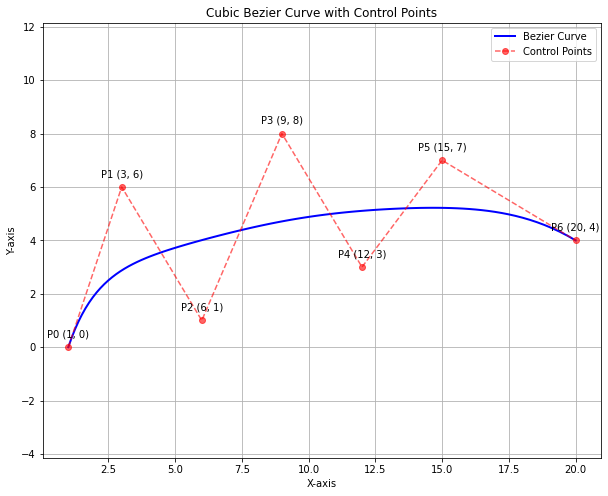

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb # comb 함수 쓰는 게 factorial 조합보다 유용함

# 베지어 곡선 계산 함수 정의
def bezier_curve(points, t):
    n = len(points)-1   # 결합함수의 차수
    points = np.array(points)   # 좌표 배열
    num_t = len(t)  # t 값의 길이
    curve_points = np.zeros((num_t, 2)) # 계산된 점들을 저장할 (t 개수, 2) 크기의 배열
    for i in range(n+1):
        # 각 t 값에 대한 베른슈타인 계수들 계산 (결과는 (num_t,) 크기의 배열)
        bernstein_coeff = comb(n, i)*pow(t, i)*pow(1-t, n-i)

        # 이항 계수 배열 (num_t, )과 i번째 제어점 (2, )을 곱함
        # 넘파이 브로드캐스팅을 위해 계수 배열을 (num_t, 1)로 모양 바꿔줌
        # (num_t, 1) * (2, ) -> (num_t, 2) 형태로 자동 계산됨
        curve_points += bernstein_coeff[:, np.newaxis]*points[i]
    return curve_points
    
# 제어점 좌표
control_points = np.array([[1, 0], [3, 6], [6, 1], [9, 8], [12, 3], [15, 7], [20, 4]])

# t 값 생성
num_points = 100
t_values = np.linspace(0, 1, num_points)

# 베지어 곡선 위의 점들 계산
curve_points = bezier_curve(control_points, t_values) # 결과는 (num_points, 2) 크기의 배열

# Matplotlib을 이용한 시각화
plt.figure(figsize=(10, 8)) # 그림 크기 설정

# 계산된 베지어 곡선 점들을 연결해서 그림
# curve_points[:, 0]는 모든 점의 x 좌표, curve_points[:, 1]는 y 좌표
plt.plot(curve_points[:, 0], curve_points[:, 1], label='Bezier Curve', color='blue', linewidth=2) # 곡선 두께 설정

# 제어점들도 같이 그려주면 곡선이 어떻게 만들어졌는지 보기 쉬움
# 'ro--' 옵션은 빨간색(r) 원(o)으로 점을 표시하고 점선(--)으로 연결하라는 뜻
plt.plot(control_points[:, 0], control_points[:, 1], 'ro--', label='Control Points', alpha=0.6)

# 그림 제목과 축 레이블 설정
plt.title('Cubic Bezier Curve with Control Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# 범례 표시 (label로 지정한 이름들 보여줌)
plt.legend()

# 격자 표시해서 좌표 보기 편하게
plt.grid(True)

# x축과 y축의 스케일을 같게 설정 (곡선 모양 왜곡 방지)
plt.axis('equal')

# 점들 좌표값 명시해주기
for i, point in enumerate(control_points):
    plt.annotate(f'P{i} ({point[0]}, {point[1]})', (point[0], point[1]), textcoords="offset points", xytext=(0,10), ha='center')

# 그림 보여주기
plt.show()

<br>

## Problem 2
- **어떤 3차원 모델 객체에 대해 x축, y축, z축 방향으로 각각 1, 0, 1 만큼 이동하고, x축과 y축 방향으로는 원래 모양을 유지하면서 z축 방향으로 2배 확대하고자 한다. 이 모델을 이루는 한 점 $P(1,1,0)$에 대하여 변환이 수행된 뒤의 좌표 값을 계산하시오.(변환 행렬과 계산 결과 모두 제시)**

<br>

### Description
- **3D Translation Transformation**
  - 점의 좌표를 동차 좌표(Homogeneous Coordinates)로 확장하고, 이동 값을 포함하는 변환 행렬을 곱해서 계산
    - 점 P(1,1,0)
      - $P_{hom} = [1,1,0,1]$
    - 이동 변환 행렬
      - $\begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        T_x & T_y & T_z & 1
      \end{bmatrix} = \begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        1 & 0 & 1 & 1
      \end{bmatrix}$

<br>

### Result

In [24]:
import numpy as np

# 점 P의 3차원 좌표
p = np.array([1, 1, 0])

# 점 P의 동차 좌표
p_hom = np.array([p[0], p[1], p[2], 1])
print(f"P의 동차 좌표: {p_hom}")

# 이동량 정의
tx, ty, tz = 1, 0, 1
print(f"\n이동량: Tx={tx}, Ty={ty}, Tz={tz}")

# 이동 변환 행렬
t_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [tx, ty, tz, 1]
])
print("\n이동 변환 행렬:")
print(t_matrix)

# 행렬 곱셈을 사용해서 점 P'의 동차 좌표 계산
# 넘파이에서는 @ 연산자로 행렬 곱셈을 쉽게 할 수 있음
new_hom = p_hom @ t_matrix
print(f"\n점 P'의 동차 좌표: {new_hom}")

# 점 P'의 동차 좌표를 다시 3차원 카티션 좌표로 변환
# 동차 좌표 [x', y', z', w'] 에서 w'으로 각 성분을 나눠줌
# 이동 변환의 경우 w'는 항상 1이기 때문에 실제 좌표 값은 변하지 않음
w_prime = new_hom[3] # w'
new_point_3d = new_hom[:3]/w_prime # [x'/w', y'/w', z'/w'] 계산
print(f"\nP'의 3차원 좌표: {new_point_3d}")

P의 동차 좌표: [1 1 0 1]

이동량: Tx=1, Ty=0, Tz=1

이동 변환 행렬:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 1 1]]

점 P'의 동차 좌표: [2 1 1 1]

P'의 3차원 좌표: [2. 1. 1.]


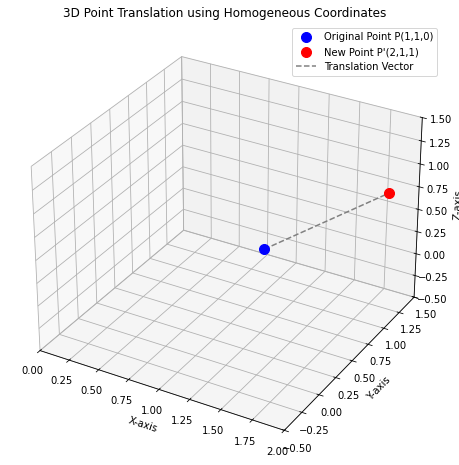

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3차원 그림을 위한 툴킷 불러오기

# P와 P'의 3차원 좌표
p = np.array([1, 1, 0])
p_d = np.array([2, 1, 1]) # 위 계산 결과 사용

# 그림(figure)과 3차원 축(axes) 생성
fig = plt.figure(figsize=(10, 8)) # 그림 크기 설정
ax = fig.add_subplot(111, projection='3d') # 3차원 플롯 설정 (기본 RHS)

# P와 P' 그리기
ax.scatter([p[0]], [p[1]], [p[2]], c='blue', marker='o', s=100, label='Original Point P(1,1,0)')
ax.scatter([p_d[0]], [p_d[1]], [p_d[2]], c='red', marker='o', s=100, label='New Point P\'(2,1,1)')

# 이동 벡터 그리기
ax.plot([p[0], p_d[0]],
        [p[1], p_d[1]],
        [p[2], p_d[2]], color='gray', linestyle='--', label='Translation Vector')

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그림 제목 설정
plt.title('3D Point Translation using Homogeneous Coordinates')

# 범례 표시
ax.legend()

# 격자 표시
ax.grid(True)

# 축 범위 설정 (두 점과 원점을 포함해서 잘 보이도록)
# x, y, z 좌표들의 최소/최대 값을 찾아서 적절히 범위 지정
all_coords = np.vstack((p, p_d, [0,0,0])) # 원점도 포함시켜서 범위 잡기
max_range = np.array([all_coords[:,0].max() - all_coords[:,0].min(),
                      all_coords[:,1].max() - all_coords[:,1].min(),
                      all_coords[:,2].max() - all_coords[:,2].min()]).max() / 2.0

mid_x = (all_coords[:,0].max() + all_coords[:,0].min()) * 0.5
mid_y = (all_coords[:,1].max() + all_coords[:,1].min()) * 0.5
mid_z = (all_coords[:,2].max() + all_coords[:,2].min()) * 0.5

ax.set_xlim([mid_x - max_range, mid_x + max_range])
ax.set_ylim([mid_y - max_range, mid_y + max_range])
ax.set_zlim([mid_z - max_range, mid_z + max_range])


# 그림 보여주기
plt.show()


<br>

## Problem 3
- **어떤 3차원 모델에 대하여 한 점 $(1,0,0)$을 고정점으로 하고 z축을 회전축으로 하여 $+90\degree$만큼 회전시키고자 한다. 이 모델을 이루는 한 점 $P(0,1,1)$은 어떠한 좌표로 변환되는 지 계산하시오.(변환 행렬과 계산 결과 모두 제시)**

<br>

### Description
- **3D Rotation Transformation**
  - 고정점을 원점으로 이동
    - 점 P의 동차 좌표와 고정점 $(1,0,0)$을 원점으로 전환하기 위한 이동 변환 행렬
    - $P_{hom}=[0,1,1,1]$
    - $\begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        -1 & 0 & 0 & 1
      \end{bmatrix}$
  - 전환된 점을 원점을 기준으로 z축을 회전축으로 회전
    - $x'=x\,cos\theta - y\,sin\theta$
    - $y'=x\,sin\theta + y\,cos\theta$
    - $z'=z$
  - 행렬식($\theta = +90\degree = \frac{\pi}{2}$)
    - $cos\,\frac{\pi}{2}=0$
    - $sin\,\frac{\pi}{2}=1$
    - $\begin{bmatrix}
      \cos \theta & \sin \theta & 0 & 0 \\
      -\sin \theta & \cos \theta & 0 & 0 \\
      0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 1
    \end{bmatrix} = \begin{bmatrix}
      0 & 1 & 0 & 0 \\
      -1 & 0 & 0 & 0 \\
      0 & 0 & 1 & 0 \\
      0 & 0 & 0 & 1
    \end{bmatrix}$
  - 중심점을 원래 위치로 되돌리기
    - $\begin{bmatrix}
        1 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 \\
        0 & 0 & 1 & 0 \\
        1 & 0 & 0 & 1
      \end{bmatrix}$
      
<br>

### Result

In [ ]:
import numpy as np
import math # 각도 계산을 위해 math 모듈 사용

# P의 3차원 좌표
p = np.array([0, 1, 1])
print(f"P의 3차원 좌표: {p}")

# 고정점의 3차원 좌표
pivot = np.array([1, 0, 0])
print(f"고정점의 3차원 좌표: {pivot}")

# 회전 각도 (+90도)
angle_degrees = 90
angle_radians = math.radians(angle_degrees) # 라디안으로 변환

# 1. 고정점을 원점으로 이동시키는 행렬 (Translation to Origin)
# 이동량은 고정점 좌표의 음수
tx_to = -pivot[0]
ty_to = -pivot[1]
tz_to = -pivot[2]
translation_to_origin_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [tx_to, ty_to, tz_to, 1]
])

# 2. 원점 기준 z축 회전 행렬 (+90도)
cos_theta = math.cos(angle_radians)
sin_theta = math.sin(angle_radians)
rotation_z_matrix = np.array([
    [cos_theta, sin_theta, 0, 0],
    [-sin_theta, cos_theta, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
# 90도 회전: cos_theta=0, sin_theta=1
# rotation_z_matrix = np.array([[0, 1, 0, 0], [-1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])

# 3. 원래 위치로 되돌리는 행렬 (Translation Back)
# 이동량은 고정점 좌표 그대로
tx_back = pivot[0]
ty_back = pivot[1]
tz_back = pivot[2]
translation_back_matrix = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [tx_back, ty_back, tz_back, 1]
])

# --- 점 P에 대한 전체 행렬 연산 ---
# 점 P를 동차 좌표로 변환 (row vector [x, y, z, 1])
p_hom = np.array([p[0], p[1], p[2], 1])
print(f"\nP의 동차 좌표: {p_hom}")

# 동차 좌표 점을 원점 기준으로 변환
temp = p_hom @ translation_to_origin_matrix
print(f"원점 기준 모델의 P 동차 좌표: {temp}")

# 원점에서 회전
temp = temp @ rotation_z_matrix
print(f"원점 기준으로 z축 회전한 P 동차 좌표: {temp}")

# 원래 위치로 되돌리기
new_hom = temp @ translation_back_matrix
print(f"P'의 동차 좌표 (변환 후): {new_hom}")

# 새로운 점의 동차 좌표를 다시 3차원 카티션 좌표로 변환
# 마지막 성분 w'으로 나눠주면 됨 (이동/회전 변환에서는 w'이 항상 1임)
w_prime = new_hom[3]
new_point = new_hom[:3]/w_prime
print(f"새로운 점 P'의 3차원 좌표: {new_point}")


P의 3차원 좌표: [0 1 1]
고정점의 3차원 좌표: [1 0 0]

P의 동차 좌표: [0 1 1 1]
원점 기준 모델의 P 동차 좌표: [-1  1  1  1]
원점 기준으로 z축 회전한 P 동차 좌표: [-1. -1.  1.  1.]
P'의 동차 좌표 (변환 후): [ 0. -1.  1.  1.]
새로운 점 P'의 3차원 좌표: [ 0. -1.  1.]


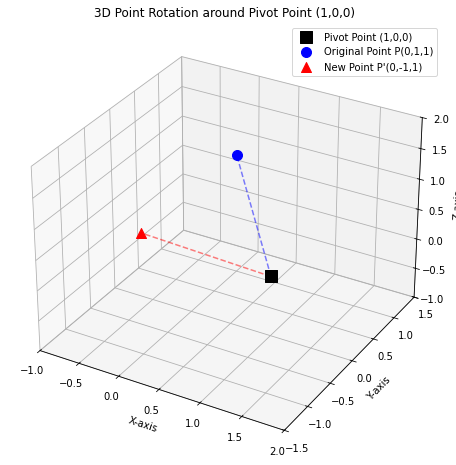

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 계산된 점들 좌표 (위 계산 결과 사용)
p = np.array([0, 1, 1])
pivot = np.array([1, 0, 0])
new_p = np.array([0, -1, 1]) # 계산된 새로운 좌표

# 그림(figure)과 3차원 축(axes) 생성
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d') # 3차원 플롯 (기본 RHS)

# 고정점 그리기 (검은색 큰 마커)
ax.scatter([pivot[0]], [pivot[1]], [pivot[2]], c='black', marker='s', s=150, label='Pivot Point (1,0,0)')

# 원래 점 그리기 (파란색 마커)
ax.scatter([p[0]], [p[1]], [p[2]], c='blue', marker='o', s=100, label='Original Point P(0,1,1)')

# 새로운 점 그리기 (빨간색 마커)
ax.scatter([new_p[0]], [new_p[1]], [new_p[2]], c='red', marker='^', s=100, label='New Point P\'(0,-1,1)')

# 고정점에서 원래 점으로 선 그리기
ax.plot([pivot[0], p[0]],
        [pivot[1], p[1]],
        [pivot[2], p[2]], color='blue', linestyle='--', alpha=0.5)

# 고정점에서 새로운 점으로 선 그리기
ax.plot([pivot[0], new_p[0]],
        [pivot[1], new_p[1]],
        [pivot[2], new_p[2]], color='red', linestyle='--', alpha=0.5)

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그림 제목 설정
plt.title('3D Point Rotation around Pivot Point (1,0,0)')

# 범례 표시
ax.legend()

# 격자 표시
ax.grid(True)

# 축 범위 설정 (세 점과 원점을 포함해서 잘 보이도록)
all_coords = np.vstack((p, pivot, new_p, [0,0,0]))
max_range = np.array([all_coords[:,0].max() - all_coords[:,0].min(),
                      all_coords[:,1].max() - all_coords[:,1].min(),
                      all_coords[:,2].max() - all_coords[:,2].min()]).max() / 2.0

mid_x = (all_coords[:,0].max() + all_coords[:,0].min()) * 0.5
mid_y = (all_coords[:,1].max() + all_coords[:,1].min()) * 0.5
mid_z = (all_coords[:,2].max() + all_coords[:,2].min()) * 0.5

ax.set_xlim([mid_x - max_range -0.5, mid_x + max_range + 0.5]) # 약간 여유 추가
ax.set_ylim([mid_y - max_range -0.5, mid_y + max_range + 0.5])
ax.set_zlim([mid_z - max_range -0.5, mid_z + max_range + 0.5])

# 그림 보여주기
plt.show()
